# Diamond Pricing Model

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')
filename='/content/drive/My Drive/datasets/Diamond_Pricing_Data.csv'
df= pd.read_csv(filename)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sr. No.,carat,cut,color,clarity,price
0,1,0.23,Ideal,E,SI2,326
1,2,0.21,Premium,E,SI1,326
2,3,0.23,Good,E,VS1,327
3,4,0.29,Premium,I,VS2,334
4,5,0.31,Good,J,SI2,335


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sr. No.  53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   price    53940 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ MB


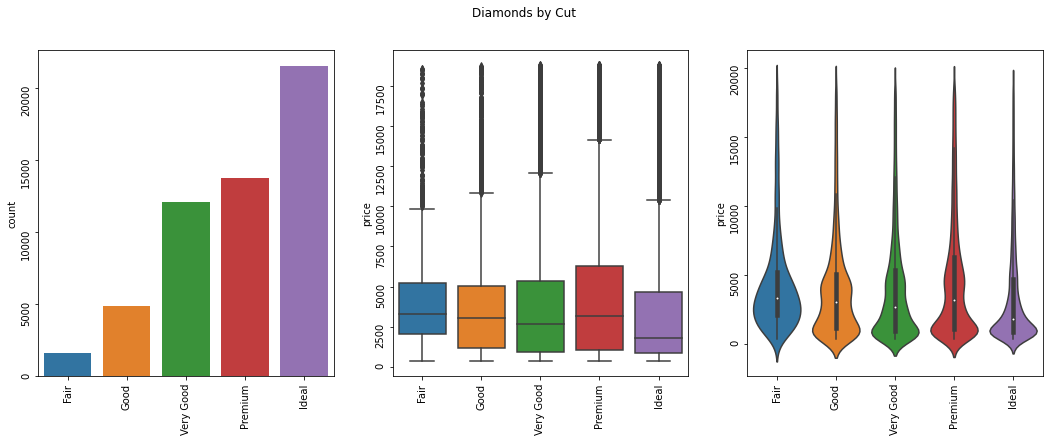

In [ ]:
# Plot by cut
fig,ax=plt.subplots(ncols=3, figsize = (18,6))
fig.suptitle('Diamonds by Cut')
g1=sns.countplot(ax=ax[0],x="cut", data=df,order=['Fair','Good','Very Good','Premium','Ideal'])
g1.set(xlabel=None)
g1.tick_params(labelrotation=90)
g2=sns.boxplot(x="cut", y="price", order=['Fair','Good','Very Good','Premium','Ideal'], data=df, ax=ax[1])
g2.set(xlabel=None)
g2.tick_params(labelrotation=90)
g3=sns.violinplot(ax=ax[2],x="cut", y="price", order=['Fair','Good','Very Good','Premium','Ideal'], data=df,scale='width',legend=False)
g3.set(xlabel=None)
g3.tick_params(labelrotation=90)

# It is seen that most diamonds, given in the dataset, has ideal cut. Juding by pricing, it is seen that the
# premium cut is most expensivwe.

[Text(0.5, 0, '')]

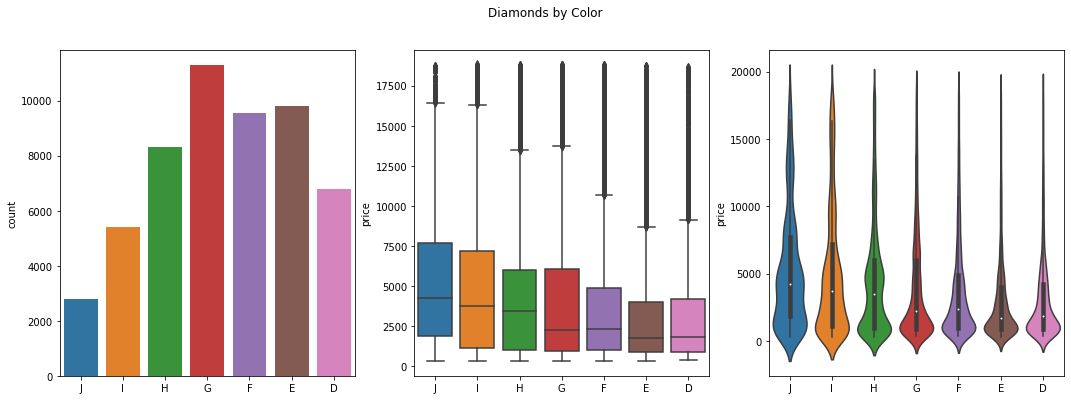

In [ ]:
# Plot by color
fig,ax=plt.subplots(ncols=3, figsize = (18,6))
fig.suptitle('Diamonds by Color')
g1=sns.countplot(ax=ax[0],x="color", data=df.sort_values(by=['color'],ascending=False))
g1.set(xlabel=None)
g2=sns.boxplot(x="color", y="price", data=df.sort_values(by=['color'],ascending=False), ax=ax[1])
g2.set(xlabel=None)
g3=sns.violinplot(ax=ax[2],x="color", y="price", data=df.sort_values(by=['color'],ascending=False),scale='width',legend=False)
g3.set(xlabel=None)

# Most diamonds are in color G, which is then followed by color E, F. Color J and I are most expensive having similar price 
# followed by the colors G and H.

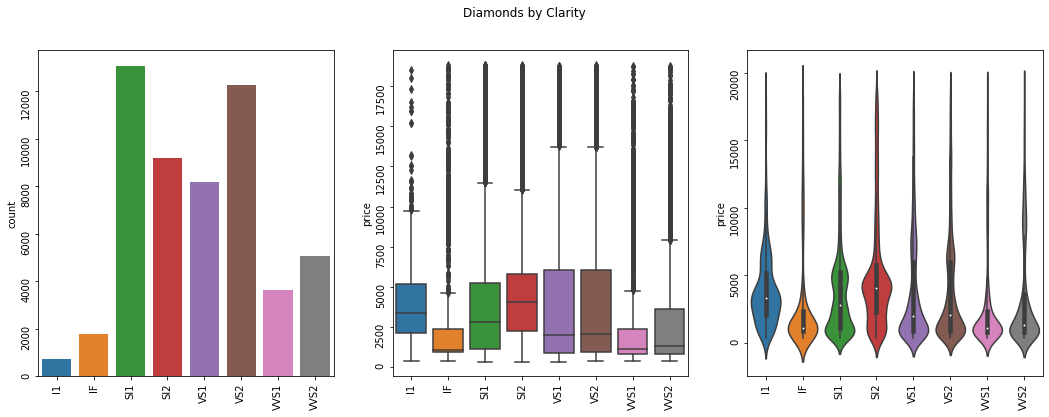

In [ ]:
# Plot by clarity
fig,ax=plt.subplots(ncols=3, figsize = (18,6))
fig.suptitle('Diamonds by Clarity')
g1=sns.countplot(ax=ax[0],x="clarity", data=df.sort_values(by=['clarity']))
g1.set(xlabel=None)
g1.tick_params(labelrotation=90)
g2=sns.boxplot(x="clarity", y="price", data=df.sort_values(by=['clarity']), ax=ax[1])
g2.set(xlabel=None)
g2.tick_params(labelrotation=90)
g3=sns.violinplot(ax=ax[2],x="clarity", y="price", data=df.sort_values(by=['clarity']),scale='width',legend=False)
g3.set(xlabel=None)
g3.tick_params(labelrotation=90)

# Most diamonds has SI1 clarity. Most expensive diamonds have VS1 and VS2 clarity.

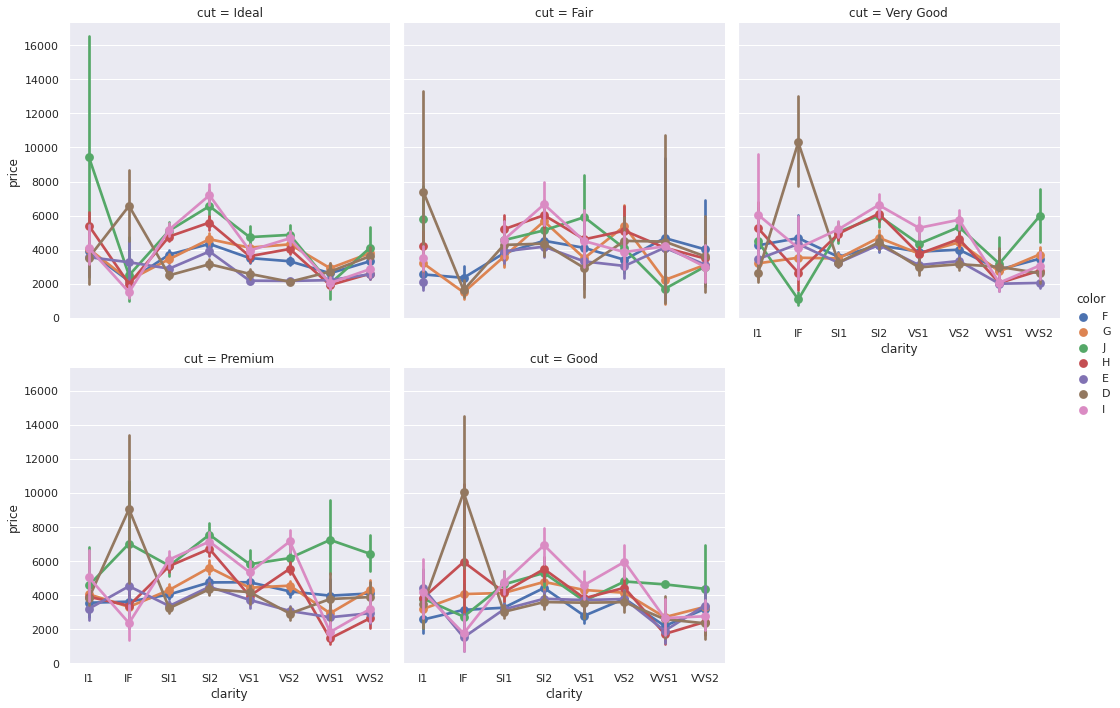

In [ ]:
# Clarity by Cut and Price
sns.set(rc={'figure.figsize':(20,14)})
sns.catplot(x="clarity", y="price", hue="color", kind="point", col ='cut', data=df.sort_values(by=['clarity']),col_wrap=3)

In [42]:
df.drop(['Sr. No.'], axis=1, inplace=True)

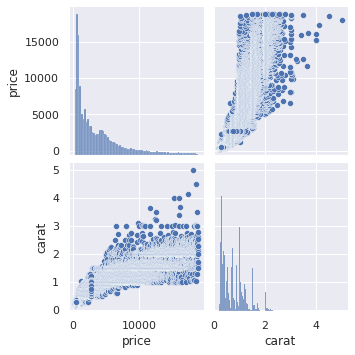

In [39]:
sns.pairplot(df[['price','carat']])

In [43]:
# Changing all columns to numeric
cut = pd.get_dummies(df.cut, drop_first = True)
color = pd.get_dummies(df.color, drop_first = True)
clarity = pd.get_dummies(df.clarity, drop_first = True)

df = pd.concat([df, cut, color, clarity], axis = 1)

df.drop(['cut', 'color', 'clarity'], axis = 1, inplace = True)

In [45]:
# Moving the target 'price' to the first column
price_col = df.pop('price')
df.insert(0, price_col.name, price_col)
pd.options.display.max_columns = None
df.head()

,price,carat,Good,Ideal,Premium,Very Good,E,F,G,H,I,J,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,326,0.23,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,326,0.21,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,327,0.23,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,334,0.29,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,335,0.31,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Classify Riders without helmets


In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
categories=['helmet','helmet-less']
input_data=[]
target_data=[]
dir_data='/content/drive/MyDrive/Helmets_Data/3_classify'

dir_data

'/content/drive/MyDrive/Helmets_Data/3_classify'

In [ ]:
for i in categories:
    path=os.path.join(dir_data,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))  
        img_resized=resize(img_array,(150,150,3))
        input_data.append(img_resized.flatten())
        target_data.append(categories.index(i))
    print(f'loaded category:{i} successfully')

FileNotFoundError: ignored